<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell

In [2]:
# YOUR CODE HERE

import pandas as pd
past = pd.read_csv('../dat/past.csv.gz')
past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

In [3]:
past.head(2)

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,5866936,5.618978e+08,1.333333,1.333333,5550.0,15.84,15.840,0.00,1.333333,0.00,...,0.00,0.00,0.0,0.666667,0.333333,0.0,0.0,0,0.0,1.0
1,5647110,5.326529e+08,2.250000,1.500000,27556.5,5.80,5.565,1.25,0.250000,0.25,...,0.25,0.75,0.0,0.000000,0.250000,0.0,0.0,0,0.0,1.0


2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

**Answer:  We can see with the results below that a lot of customers "window shopp" without buying
- 38% 

In [4]:
# YOUR CODE HERE
past["Purchased?"].mean()

0.3438

In [57]:
for col in ["NumSessions",'NumView', 'NumRemove', 'InsessionView', 'InsessionRemove']:
    print(past.groupby('Purchased?')[col].mean())
    print('\n')

Purchased?
0    1.287649
1    1.402259
Name: NumSessions, dtype: float64


Purchased?
0    0.880742
1    0.918394
Name: NumView, dtype: float64


Purchased?
0    0.389842
1    0.458922
Name: NumRemove, dtype: float64


Purchased?
0    15.644532
1    15.274447
Name: InsessionView, dtype: float64


Purchased?
0    25.698774
1    19.884189
Name: InsessionRemove, dtype: float64




3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [5]:
# YOUR CODE HERE
X = past.drop(columns=['product_id', 'user_id'])
y = X.pop('Purchased?')

In [6]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

**Answer: We need to scale/normalize the values before applying PCA

In [7]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5, random_state=42, whiten=True)
X_reduced = pca.fit_transform(X_scaled)

In [8]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [9]:
# YOUR CODE HERE
print("Explained variation per principal component:", pca.explained_variance_ratio_)

Explained variation per principal component: [0.10281916 0.09445882 0.06506113 0.05100071 0.04255629]


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [10]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [11]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

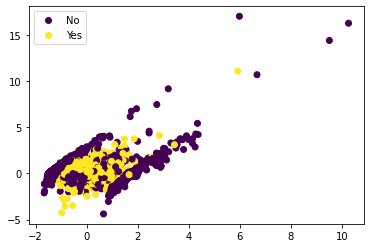

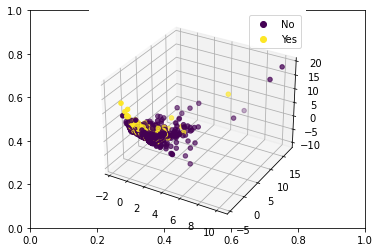

In [12]:
visualize_2pcs(X_reduced, y)# YOUR CODE HERE
visualize_3pcs(X_reduced, y)# YOUR CODE HERE

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [13]:
# YOUR CODE HERE (imports!)

import numpy as np 

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


def train(X, y, standardize = True) -> None:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Standardize and apply Logistic Regression
    if standardize == True: 
        pipeline = make_pipeline(StandardScaler(),\
            LogisticRegression(class_weight="balanced").fit(X_train, y_train))
    else:
        pipeline = make_pipeline(LogisticRegression(class_weight="balanced").fit(X_train, y_train))
                                 
    pipeline.fit(X_train, y_train)
    target_names = ["0", "1"]
                                 
    pred = pipeline.predict(X_test)  
    
    # Print Classification Report
    print(classification_report(y_test, pred, target_names = target_names))

Now apply the pipeline on the all the features `X` and review the performance

In [14]:
train(X, y, True) # YOUR CODE HERE

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

** Answer: No, because we've already scaled in the pipeline

In [15]:
train(X_reduced, y, True) # YOUR CODE HERE

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       649
           1       0.49      0.53      0.51       351

    accuracy                           0.65      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.65      0.65      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*

** Answer: The results are as expected because we omitted some data 

- Pro: Using reduced set of features helps avoid overfitting and reduces computational complexity of the model
- Con: Reduces explainability of the model

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [16]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [17]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        my_cluster = KMeans(init="k-means++", n_clusters=k, random_state=10).fit(X) # YOUR CODE HERE
        inertias.append(my_cluster.inertia_) # YOUR CODE HERE
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

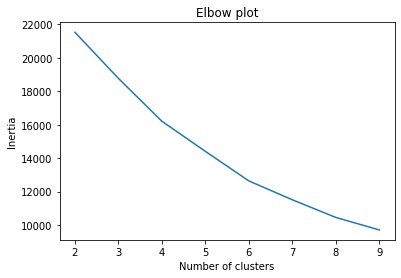

In [18]:
visualize_elbow(X_reduced, ks=list(range(2,10))) # YOUR CODE HERE

4. What are the disadvantage to use the Elbow method? 

** Answer: 
- It's hard to determine the optimal value for k when there is no obvious "elbow" formation in the plot
- also possible to miss a cluster if the wrong k is chosen

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [19]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.20000076688619867
For n_clusters = 3 The average silhouette_score is : 0.2102438954664438
For n_clusters = 4 The average silhouette_score is : 0.21948064643364973
For n_clusters = 5 The average silhouette_score is : 0.22511944439171902
For n_clusters = 6 The average silhouette_score is : 0.21140126806769077
For n_clusters = 7 The average silhouette_score is : 0.21261668185265103
For n_clusters = 8 The average silhouette_score is : 0.22080792678147032


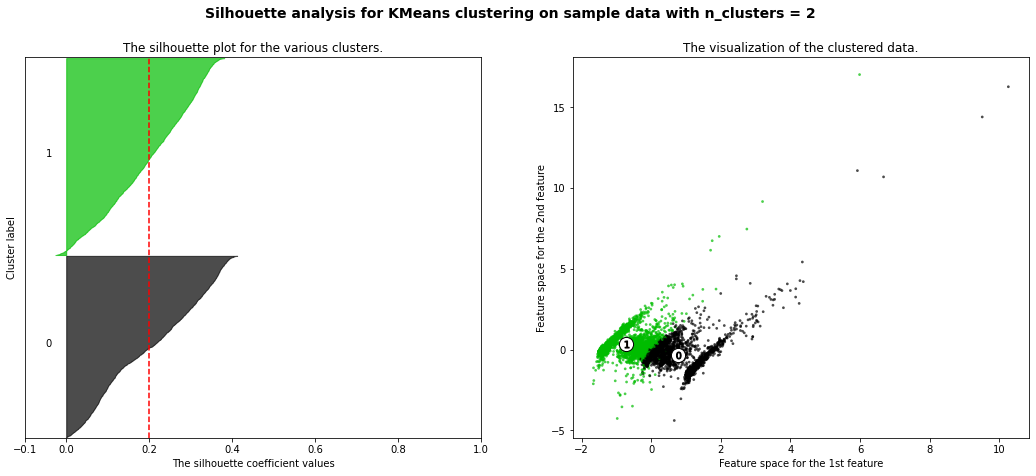

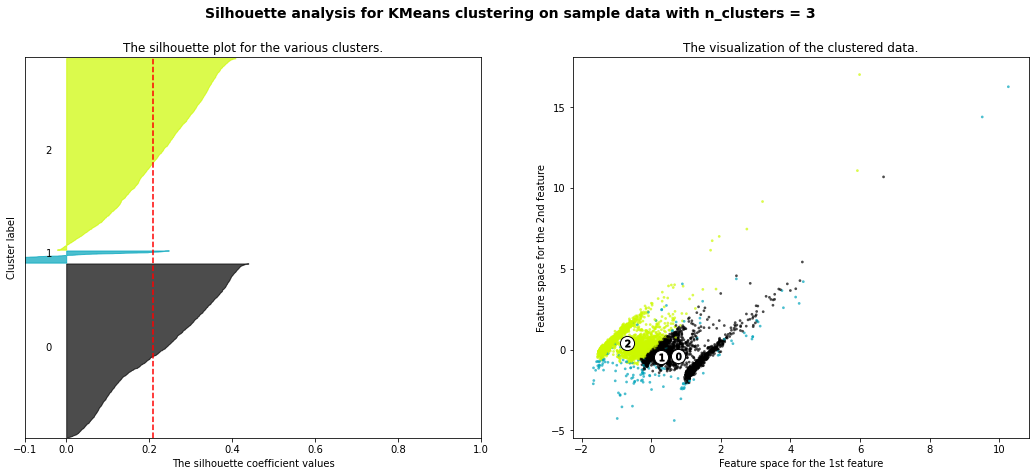

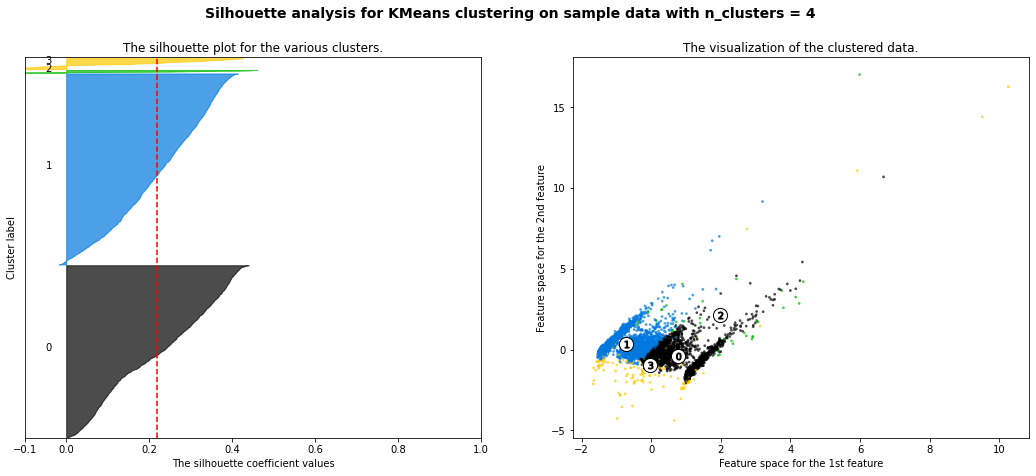

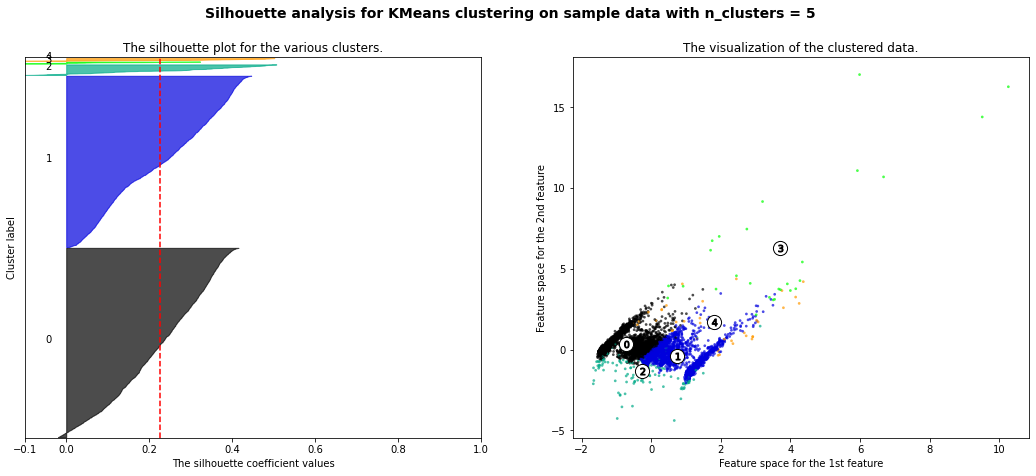

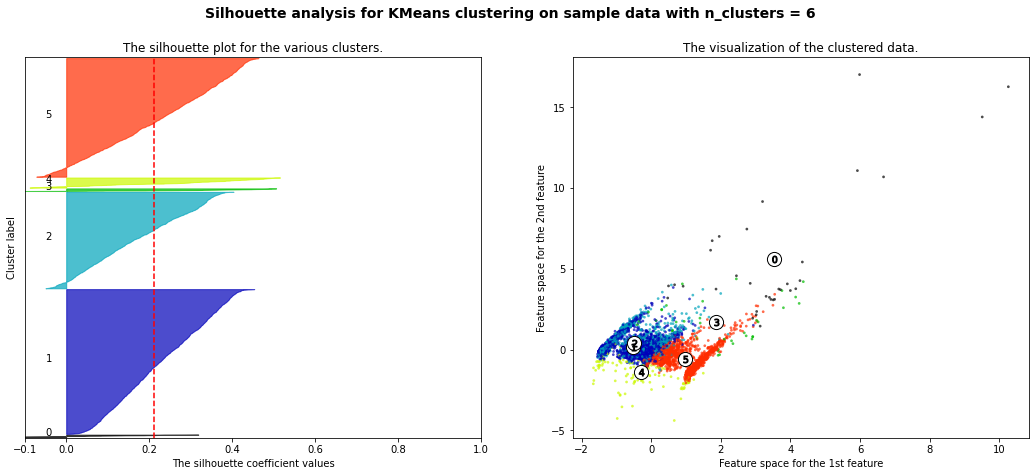

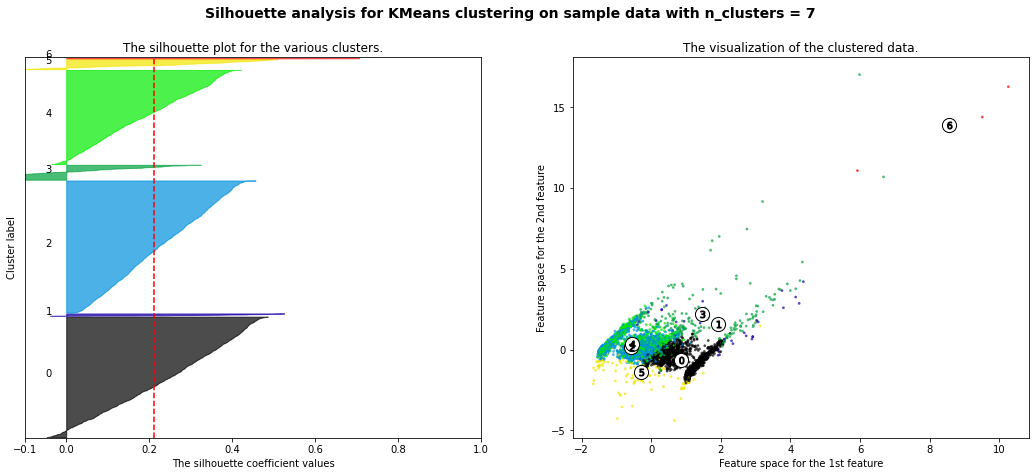

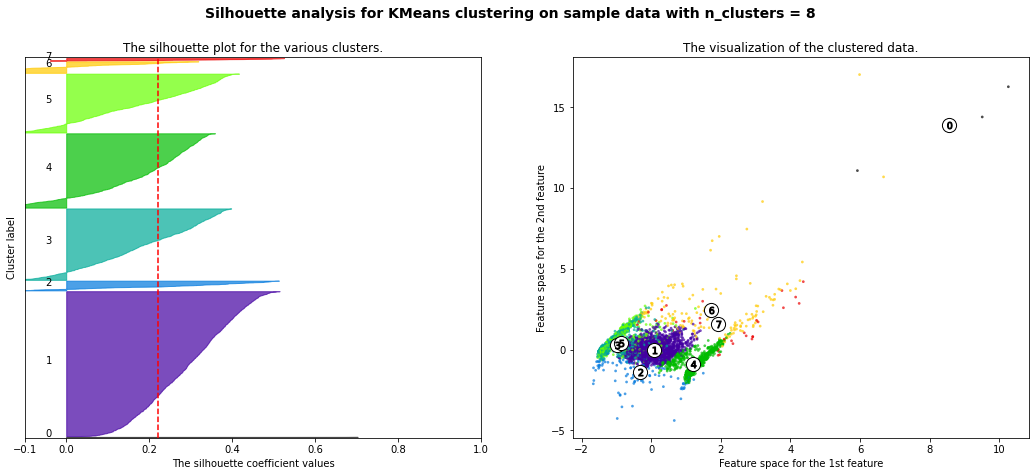

In [20]:
visualize_silhouette(max_clusters=8, X=X_reduced) # YOUR CODE HERE

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

**Answer: Consider the following when analysing for the optimat k-value
- Scores << average silhouette score = unacceptable
- Negative scores = assigned to wrong clusters
- Scores near 0 = close to decision boundary 

Given the criteria above, all plots above contain negative values and low silhouette scores (significantly << 1). Thus my judgment is based on a comparison of the average silhoutte score for {k=4 : 0.219,  k=5 : 0.225,  k=8 : 0.220} 
  
I think k=8 is the better option because we get clusters of relatively similar sizes


In [21]:
# YOUR CODE HERE
km = KMeans(n_clusters=8, random_state=0)
km.fit(X_reduced)

KMeans(random_state=0)

7. What is the size of each cluster? 

In [22]:
# YOUR CODE HERE
clusters_size = pd.DataFrame(km.labels_, columns=["cluster"]).value_counts() \
                                .reset_index().rename(columns={0:'size'}).set_index("cluster") \
                                        .sort_index()
clusters_size

,size
cluster,
0,33
1,962
2,120
3,997
4,1947
5,783
6,3
7,155


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [23]:
# YOUR CODE HERE
past['cluster_pca'] = km.predict(X_reduced)
past.head(5)

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
0,5866936,5.618978e+08,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,...,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0,3
1,5647110,5.326529e+08,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,...,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0,4
2,5790472,4.578109e+08,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,...,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0,4
3,5811598,4.612641e+08,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,...,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0,4
4,5846363,5.157993e+08,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,...,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0,4


9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

**Answer: By examining the percentage of customers who made purchases for each cluster using groupby, we can see that
- Cluster 4 is the most relevant segment as it has 38.9% of total customers, of which 61.2% making purchases
- Cluster 6 is also noteworthy seeing as it accounts for 0.06% of total customers yet 33.3% who made purchases, makes me wonder why? might be useful to examine
- On the other hand, cluster 3 is the highest segment of total customers yet the second lowest in generating purchases (~13.3%). why?

In [24]:
# YOUR CODE HERE

clusters_size['%']=  clusters_size["size"]/len(X_reduced)
cs = clusters_size.sort_index()
print(cs)

         size       %
cluster              
0          33  0.0066
1         962  0.1924
2         120  0.0240
3         997  0.1994
4        1947  0.3894
5         783  0.1566
6           3  0.0006
7         155  0.0310


In [25]:
print("% of customers who made a purchase per cluster: ")
past.groupby("cluster_pca")["Purchased?"].mean()

% of customers who made a purchase per cluster: 


cluster_pca
0    0.060606
1    0.186071
2    0.433333
3    0.133400
4    0.612224
5    0.153257
6    0.333333
7    0.258065
Name: Purchased?, dtype: float64

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

**Answer: k-means assumes first that the clusters are spherical and second that the clusters are of similar size.
Judging from the uneven cluster sizes, other methods should be considered too.

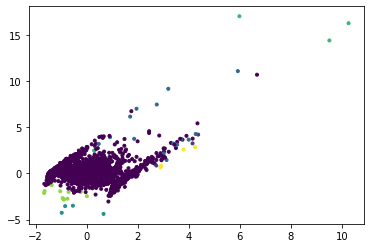

In [26]:
# YOUR CODE HERE
from sklearn.cluster import SpectralClustering
import numpy as np

sc = SpectralClustering(n_clusters=8, assign_labels="discretize",
                        random_state=42).fit(X_reduced)

fig, ax = plt.subplots()
ax.scatter(X_reduced[:,0], X_reduced[:,1], s=9, c=sc.labels_)
plt.show() 

11. Jot down recommendations or followup steps, detailing the reasons.

 **Answer : Based on previously mentioned observations, my recommendation would be to -  
 - continue with whatever strategies have been working for retaining the customers in cluster4, and 
 - invest more time and resources into growing the customers in cluster6 (rather than cluster 3) fro maximum effect

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [27]:
new = pd.read_csv('../dat/new.csv.gz') # YOUR CODE HERE

In [28]:
assert new.shape == (30091, 5)

In [29]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

**Answer:
- The number of datapoints in the training set (5000) is relatively <<< compared to test set (30,091)
- The training set has 38 features whereas test has only 5 features


In [30]:
past.shape  # training

(5000, 38)

In [31]:
new.shape # test

(30091, 5)

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

**Answer: There is no overlap, meaning that no single product is found in both training and test datasets

In [32]:
np.intersect1d(new['product_id'], past['product_id']) # YOUR CODE HERE

array([], dtype=int64)

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [33]:
new["Purchased?"].mean()# YOUR CODE HERE # ~.344

0.3442557575354757

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [34]:
past.head(2)

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
0,5866936,5.618978e+08,1.333333,1.333333,5550.0,15.84,15.840,0.00,1.333333,0.00,...,0.00,0.0,0.666667,0.333333,0.0,0.0,0,0.0,1.0,3
1,5647110,5.326529e+08,2.250000,1.500000,27556.5,5.80,5.565,1.25,0.250000,0.25,...,0.75,0.0,0.000000,0.250000,0.0,0.0,0,0.0,1.0,4


In [35]:
new.head(2)

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0


In [36]:
# YOUR CODE HERE

X_train = past[new.columns].drop(["product_id", "Purchased?"], axis=1)
X_train = X_train.to_numpy()

y_train = past["Purchased?"].to_numpy()

X_test = new.drop(["product_id", "Purchased?"], axis=1)
X_test = X_test.to_numpy()

y_test = new["Purchased?"].to_numpy()

In [37]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [38]:
# YOUR CODE HERE

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


def train(X_train, X_test, y_train, y_test, standardize = True) -> None:
    
    if standardize == True: 
        pipeline = make_pipeline(StandardScaler(),\
            LogisticRegression(class_weight="balanced").fit(X_train, y_train))
    else:
        pipeline = make_pipeline(LogisticRegression(class_weight="balanced").fit(X_train, y_train))
        
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))
    
train(X_train, X_test, y_train, y_test, standardize=True)


              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [39]:
X = np.concatenate((X_train, X_test), axis=0) # YOUR CODE HERE

In [40]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [41]:
y = np.concatenate((y_train, np.full(y_test.shape, -1))) # YOUR CODE HERE

In [42]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [43]:
# YOUR CODE HERE

from sklearn.semi_supervised import LabelSpreading

label_prop_model = LabelSpreading(kernel='knn', alpha=0.01)
label_prop_model.fit(X,y)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [44]:
semi_sup_preds = label_prop_model.transduction_[y_train.shape[0]:] # YOUR CODE HERE

In [47]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [50]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     19732
           1       0.81      0.63      0.71     10359

    accuracy                           0.82     30091
   macro avg       0.82      0.78      0.79     30091
weighted avg       0.82      0.82      0.82     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)